In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./TSLA.csv')

In [3]:
df.head()

,date,open,high,low,close,adj close,volume
0,2020-04-13,118.031998,130.399994,116.106003,130.190002,130.190002,112377000
1,2020-04-14,139.794006,148.376007,138.485992,141.977997,141.977997,152882500
2,2020-04-15,148.399994,150.626007,142.000000,145.966003,145.966003,117885000
3,2020-04-16,143.388000,151.889999,141.343994,149.042007,149.042007,103289500
4,2020-04-17,154.455994,154.990005,149.531998,150.778000,150.778000,65641000


In [4]:
df['close'].shape

(251,)

# Univariate Time Series Forcasting

<AxesSubplot:>

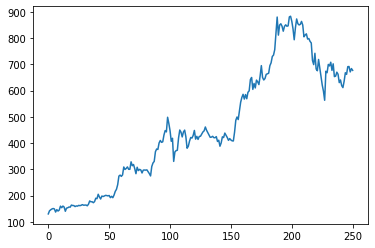

In [5]:
df['close'].plot()

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df['close'].values.reshape(-1,1))

In [7]:
scaled.shape

(251, 1)

In [8]:
# scaled[0:20,0]

In [9]:
# scaled = df['close'].values.reshape(-1,1)

In [10]:
x = []
y = []
b =20

for i in range(b,len(scaled)):
    x.append(scaled[i-b:i,0].reshape(-1,1))
    y.append(scaled[i-1,0])

In [11]:
import numpy as np

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y ,test_size = 0.2 ,shuffle=False)

In [13]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [14]:
x_train.shape

(184, 20, 1)

In [15]:
y_train.shape

(184,)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(units=50,input_shape=(b,1)))
model.add(Dense(150,activation ='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'MSE')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 150)               7650      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 18,201
Trainable params: 18,201
Non-trainable params: 0
_________________________________________________________________


In [17]:
x_train.shape

(184, 20, 1)

In [18]:
model.fit(x_train,y_train ,epochs = 10 ,batch_size = 4)

Epoch 1/10
46/46 [==============================] - 2s 11ms/step - loss: 0.0282
Epoch 2/10
46/46 [==============================] - 1s 21ms/step - loss: 0.0016
Epoch 3/10
46/46 [==============================] - 1s 17ms/step - loss: 0.0013
Epoch 4/10
46/46 [==============================] - 1s 13ms/step - loss: 0.0011
Epoch 5/10
46/46 [==============================] - 1s 21ms/step - loss: 0.0011
Epoch 6/10
46/46 [==============================] - 1s 15ms/step - loss: 0.0010
Epoch 7/10
46/46 [==============================] - 1s 11ms/step - loss: 9.9100e-04
Epoch 8/10
46/46 [==============================] - 0s 11ms/step - loss: 8.6876e-04
Epoch 9/10
46/46 [==============================] - 0s 11ms/step - loss: 0.0010
Epoch 10/10
46/46 [==============================] - 1s 11ms/step - loss: 7.4361e-04


In [19]:
y_pred = model.predict(x_test)

In [20]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1,1))

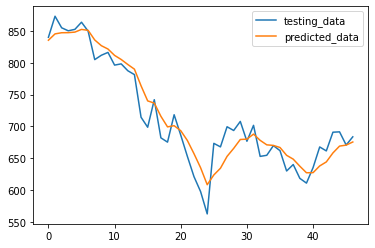

In [21]:
import matplotlib.pyplot as plt
plt.plot(y_test ,label = "testing_data")
plt.plot(y_pred ,label = "predicted_data")
plt.legend()

In [45]:
n=47

batch = x_train[-1].reshape(1,20,1)
forecast =[]

for i in range(n):
    y_pred_new = model.predict(batch)
    forecast.append(y_pred_new)
    batch = np.append(batch,y_pred_new)[1:].reshape(1,20,1)

In [50]:
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1,1)).flatten()

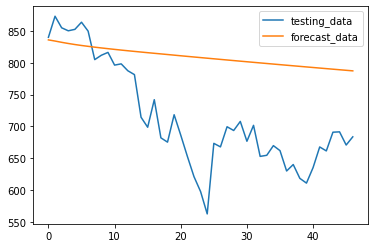

In [51]:
plt.plot(y_test ,label = "testing_data")
plt.plot(forecast ,label = "forecast_data")
plt.legend()